In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterflies-dataset/Butterfly Identification/Training_set.csv
/kaggle/input/butterflies-dataset/Butterfly Identification/Testing_set.csv
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_747.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_561.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_345.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_2566.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_1593.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_844.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_1975.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_270.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_526.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Image_968.jpg
/kaggle/input/butterflies-dataset/Butterfly Identification/test/Im

In [2]:
import pandas as pd 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras 
from PIL import Image

### load Data 

In [3]:
train_label = pd.read_csv('/kaggle/input/butterflies-dataset/Butterfly Identification/Training_set.csv')
test_label = pd.read_csv('/kaggle/input/butterflies-dataset/Butterfly Identification/Testing_set.csv')

In [4]:
train_label.head(20)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


In [5]:
train_label['label'].unique()

array(['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
       'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING',
       'EASTERN DAPPLE WHITE', 'RED POSTMAN', 'MANGROVE SKIPPER',
       'BLACK HAIRSTREAK', 'CABBAGE WHITE', 'RED ADMIRAL', 'PAINTED LADY',
       'PAPER KITE', 'SOOTYWING', 'PINE WHITE', 'PEACOCK',
       'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
       'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF',
       'PURPLISH COPPER', 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY',
       'LARGE MARBLE', 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW',
       'RED CRACKER', 'QUESTION MARK', 'CRIMSON PATCH', 'BANDED PEACOCK',
       'SCARCE SWALLOW', 'COPPER TAIL', 'GREAT JAY', 'INDRA SWALLOW',
       'VICEROY', 'MALACHITE', 'APPOLLO', 'TWO BARRED FLASHER',
       'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY', 'ORANGE TIP',
       'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
       'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SN

In [6]:
len(train_label['label'].unique())

75

In [7]:
classes = list(train_label['label'].unique())
classes

['SOUTHERN DOGFACE',
 'ADONIS',
 'BROWN SIPROETA',
 'MONARCH',
 'GREEN CELLED CATTLEHEART',
 'CAIRNS BIRDWING',
 'EASTERN DAPPLE WHITE',
 'RED POSTMAN',
 'MANGROVE SKIPPER',
 'BLACK HAIRSTREAK',
 'CABBAGE WHITE',
 'RED ADMIRAL',
 'PAINTED LADY',
 'PAPER KITE',
 'SOOTYWING',
 'PINE WHITE',
 'PEACOCK',
 'CHECQUERED SKIPPER',
 'JULIA',
 'COMMON WOOD-NYMPH',
 'BLUE MORPHO',
 'CLOUDED SULPHUR',
 'STRAITED QUEEN',
 'ORANGE OAKLEAF',
 'PURPLISH COPPER',
 'ATALA',
 'IPHICLUS SISTER',
 'DANAID EGGFLY',
 'LARGE MARBLE',
 'PIPEVINE SWALLOW',
 'BLUE SPOTTED CROW',
 'RED CRACKER',
 'QUESTION MARK',
 'CRIMSON PATCH',
 'BANDED PEACOCK',
 'SCARCE SWALLOW',
 'COPPER TAIL',
 'GREAT JAY',
 'INDRA SWALLOW',
 'VICEROY',
 'MALACHITE',
 'APPOLLO',
 'TWO BARRED FLASHER',
 'MOURNING CLOAK',
 'TROPICAL LEAFWING',
 'POPINJAY',
 'ORANGE TIP',
 'GOLD BANDED',
 'BECKERS WHITE',
 'RED SPOTTED PURPLE',
 'MILBERTS TORTOISESHELL',
 'SILVER SPOT SKIPPER',
 'AMERICAN SNOOT',
 'AN 88',
 'ULYSES',
 'COMMON BANDED AWL',
 'C

In [8]:
train_label['label'].value_counts()

MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: label, Length: 75, dtype: int64

In [9]:
output_labels = {}
for i,j in enumerate(classes):
    output_labels[j]=i
output_labels

{'SOUTHERN DOGFACE': 0,
 'ADONIS': 1,
 'BROWN SIPROETA': 2,
 'MONARCH': 3,
 'GREEN CELLED CATTLEHEART': 4,
 'CAIRNS BIRDWING': 5,
 'EASTERN DAPPLE WHITE': 6,
 'RED POSTMAN': 7,
 'MANGROVE SKIPPER': 8,
 'BLACK HAIRSTREAK': 9,
 'CABBAGE WHITE': 10,
 'RED ADMIRAL': 11,
 'PAINTED LADY': 12,
 'PAPER KITE': 13,
 'SOOTYWING': 14,
 'PINE WHITE': 15,
 'PEACOCK': 16,
 'CHECQUERED SKIPPER': 17,
 'JULIA': 18,
 'COMMON WOOD-NYMPH': 19,
 'BLUE MORPHO': 20,
 'CLOUDED SULPHUR': 21,
 'STRAITED QUEEN': 22,
 'ORANGE OAKLEAF': 23,
 'PURPLISH COPPER': 24,
 'ATALA': 25,
 'IPHICLUS SISTER': 26,
 'DANAID EGGFLY': 27,
 'LARGE MARBLE': 28,
 'PIPEVINE SWALLOW': 29,
 'BLUE SPOTTED CROW': 30,
 'RED CRACKER': 31,
 'QUESTION MARK': 32,
 'CRIMSON PATCH': 33,
 'BANDED PEACOCK': 34,
 'SCARCE SWALLOW': 35,
 'COPPER TAIL': 36,
 'GREAT JAY': 37,
 'INDRA SWALLOW': 38,
 'VICEROY': 39,
 'MALACHITE': 40,
 'APPOLLO': 41,
 'TWO BARRED FLASHER': 42,
 'MOURNING CLOAK': 43,
 'TROPICAL LEAFWING': 44,
 'POPINJAY': 45,
 'ORANGE TIP':

In [10]:
# reading images 
directory = '/kaggle/input/butterflies-dataset/Butterfly Identification/train/'
train_images = os.listdir('/kaggle/input/butterflies-dataset/Butterfly Identification/train')
train_images.sort()
train_images

['Image_1.jpg',
 'Image_10.jpg',
 'Image_100.jpg',
 'Image_1000.jpg',
 'Image_1001.jpg',
 'Image_1002.jpg',
 'Image_1003.jpg',
 'Image_1004.jpg',
 'Image_1005.jpg',
 'Image_1006.jpg',
 'Image_1007.jpg',
 'Image_1008.jpg',
 'Image_1009.jpg',
 'Image_101.jpg',
 'Image_1010.jpg',
 'Image_1011.jpg',
 'Image_1012.jpg',
 'Image_1013.jpg',
 'Image_1014.jpg',
 'Image_1015.jpg',
 'Image_1016.jpg',
 'Image_1017.jpg',
 'Image_1018.jpg',
 'Image_1019.jpg',
 'Image_102.jpg',
 'Image_1020.jpg',
 'Image_1021.jpg',
 'Image_1022.jpg',
 'Image_1023.jpg',
 'Image_1024.jpg',
 'Image_1025.jpg',
 'Image_1026.jpg',
 'Image_1027.jpg',
 'Image_1028.jpg',
 'Image_1029.jpg',
 'Image_103.jpg',
 'Image_1030.jpg',
 'Image_1031.jpg',
 'Image_1032.jpg',
 'Image_1033.jpg',
 'Image_1034.jpg',
 'Image_1035.jpg',
 'Image_1036.jpg',
 'Image_1037.jpg',
 'Image_1038.jpg',
 'Image_1039.jpg',
 'Image_104.jpg',
 'Image_1040.jpg',
 'Image_1041.jpg',
 'Image_1042.jpg',
 'Image_1043.jpg',
 'Image_1044.jpg',
 'Image_1045.jpg',
 'I

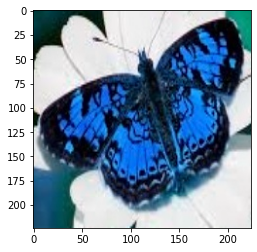

In [11]:
plt.imshow(cv2.imread((directory+train_images[5])),cmap='gray')
# train_images

### reading the images using cv2

In [12]:
images_data = []
for i in train_images:
    img = cv2.imread(directory+i)
    img_resized = cv2.resize(img,(100,100))
    images_data.append(img_resized)
images_data

[array([[[ 30,  43,  25],
         [ 28,  42,  26],
         [ 29,  45,  28],
         ...,
         [ 14,  30,  19],
         [ 24,  48,  36],
         [ 35,  61,  50]],
 
        [[ 28,  45,  24],
         [ 24,  43,  24],
         [ 24,  42,  25],
         ...,
         [ 25,  46,  37],
         [ 49,  76,  66],
         [ 51,  82,  73]],
 
        [[ 23,  43,  20],
         [ 22,  41,  20],
         [ 24,  40,  22],
         ...,
         [ 39,  68,  59],
         [ 59,  93,  85],
         [ 62,  99,  93]],
 
        ...,
 
        [[ 59,  97,  59],
         [ 74, 122,  84],
         [ 70, 110,  88],
         ...,
         [ 46,  79,  58],
         [ 53,  91,  69],
         [ 59, 101,  77]],
 
        [[ 64, 102,  65],
         [ 72, 119,  80],
         [ 63, 103,  80],
         ...,
         [ 16,  45,  29],
         [ 23,  59,  39],
         [ 26,  69,  46]],
 
        [[ 68, 105,  70],
         [ 76, 123,  85],
         [ 72, 111,  87],
         ...,
         [ 19,  50,  32],
  

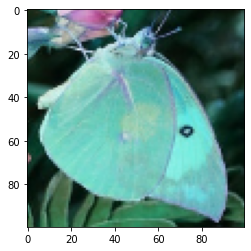

In [13]:
plt.imshow(images_data[0])

In [14]:
Y = []
tt2 = train_label
tt2.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [15]:
# reset the index to be the filename of the image
tt2.set_index('filename',inplace=True)
tt2.head()

,label
filename,
Image_1.jpg,SOUTHERN DOGFACE
Image_2.jpg,ADONIS
Image_3.jpg,BROWN SIPROETA
Image_4.jpg,MONARCH
Image_5.jpg,GREEN CELLED CATTLEHEART


In [16]:
Y = []
for i in train_images:
    Y.append(output_labels[tt2.loc[i,'label']])
Y

[0,
 7,
 36,
 58,
 31,
 56,
 47,
 64,
 18,
 29,
 31,
 37,
 73,
 48,
 17,
 42,
 4,
 72,
 36,
 53,
 31,
 25,
 71,
 28,
 49,
 8,
 70,
 53,
 43,
 23,
 51,
 56,
 14,
 4,
 45,
 36,
 74,
 48,
 48,
 47,
 27,
 5,
 63,
 27,
 74,
 41,
 25,
 68,
 54,
 35,
 9,
 52,
 54,
 19,
 55,
 59,
 4,
 2,
 36,
 43,
 6,
 9,
 58,
 34,
 18,
 28,
 2,
 73,
 27,
 36,
 8,
 35,
 2,
 22,
 51,
 10,
 43,
 13,
 41,
 50,
 72,
 64,
 39,
 0,
 13,
 26,
 40,
 61,
 17,
 29,
 38,
 37,
 59,
 39,
 49,
 64,
 14,
 36,
 1,
 31,
 28,
 51,
 38,
 26,
 65,
 15,
 38,
 9,
 64,
 4,
 27,
 64,
 8,
 24,
 32,
 53,
 13,
 71,
 19,
 65,
 54,
 6,
 12,
 2,
 2,
 69,
 47,
 55,
 15,
 63,
 66,
 16,
 26,
 2,
 59,
 19,
 53,
 8,
 28,
 12,
 30,
 29,
 58,
 0,
 51,
 53,
 27,
 33,
 1,
 40,
 63,
 50,
 29,
 36,
 4,
 37,
 14,
 9,
 53,
 62,
 19,
 67,
 13,
 70,
 53,
 52,
 0,
 57,
 7,
 68,
 18,
 38,
 61,
 37,
 72,
 25,
 21,
 3,
 72,
 10,
 5,
 62,
 43,
 9,
 37,
 6,
 58,
 58,
 22,
 68,
 52,
 54,
 58,
 23,
 5,
 58,
 31,
 52,
 34,
 24,
 48,
 48,
 25,
 4,
 26,
 9,
 33,
 1

### Normalization 

In [17]:
# Normalized data
X = np.array(images_data)
X = X/255
X.shape

(6499, 100, 100, 3)

In [18]:
Y = np.array(Y)

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X,Y,test_size=.2,random_state=42)

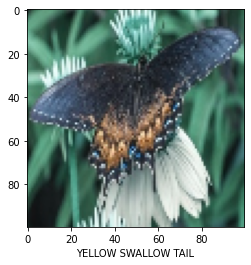

In [20]:
plt.imshow(x_train[30])
plt.xlabel(classes[y_train[30]])
plt.show()

### Define Our Model

In [21]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(100, 
                                                              100,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

2023-01-07 00:26:14.518786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 00:26:14.519776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 00:26:14.783460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 00:26:14.784344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 00:26:14.785179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [22]:
model = keras.Sequential(
    [
        data_augmentation,
        keras.layers.Conv2D(32,3,activation='relu',padding='same'),
        keras.layers.MaxPool2D(),
#         keras.layers.Dropout(.2),
        keras.layers.Conv2D(64,3,activation='relu',padding='same'),
        keras.layers.MaxPool2D(),
#         keras.layers.Dropout(.2),
        keras.layers.Conv2D(128,3,activation='relu',padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(256,3,activation='relu',padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.Dropout(.2),
        keras.layers.Flatten(),
        keras.layers.Dense(256,activation='sigmoid'),
        keras.layers.Dense(len(classes),activation='softmax')

    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)      

### model train

In [23]:
model.fit(x_train,y_train,epochs=50)

2023-01-07 00:26:20.706424: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 623880000 exceeds 10% of free system memory.
2023-01-07 00:26:21.423979: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 623880000 exceeds 10% of free system memory.
2023-01-07 00:26:21.951968: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-07 00:26:24.656991: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 16s 16ms/step - loss: 3.9159 - accuracy: 0.0758
Epoch 2/50
163/163 [==============================] - 2s 14ms/step - loss: 3.0194 - accuracy: 0.2245
Epoch 3/50
163/163 [==============================] - 2s 14ms/step - loss: 2.5129 - accuracy: 0.3347
Epoch 4/50
163/163 [==============================] - 3s 16ms/step - loss: 2.1551 - accuracy: 0.4203
Epoch 5/50
163/163 [==============================] - 2s 14ms/step - loss: 1.8943 - accuracy: 0.4784
Epoch 6/50
163/163 [==============================] - 2s 15ms/step - loss: 1.7027 - accuracy: 0.5297
Epoch 7/50
163/163 [==============================] - 2s 14ms/step - loss: 1.5332 - accuracy: 0.5734
Epoch 8/50
163/163 [==============================] - 2s 14ms/step - loss: 1.4135 - accuracy: 0.6028
Epoch 9/50
163/163 [==============================] - 2s 14ms/step - loss: 1.3003 - accuracy: 0.6299
Epoch 10/50
163/163 [==============================] - 2s 14ms/step - loss: 1.2384 - accuracy: 0.6440

In [24]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 1s 9ms/step - loss: 0.9276 - accuracy: 0.7577


[0.9276493787765503, 0.7576923370361328]

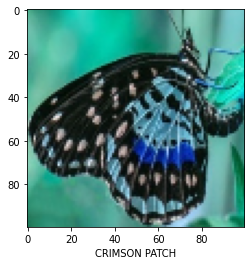

In [25]:
plt.imshow(x_test[22])
plt.xlabel(classes[y_test[22]])
plt.show()

In [26]:
predicted = model.predict(x_test)

In [27]:
class_pre = np.argmax(predicted[22])
class_pre

33

In [28]:
classes[class_pre]

'CRIMSON PATCH'